In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/KMeans.csv")
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [3]:
x = dataset.iloc[:,[1,2]].values

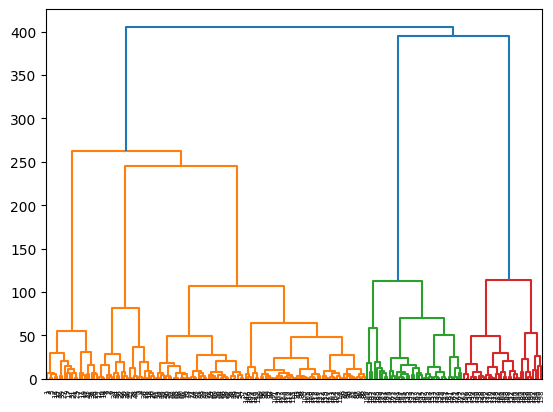

In [4]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

In [5]:
#From this graph we can decide easily the optimal number of clusters can be taken
#Elbow method - helps us to identify the optimal number of clusters

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,linkage="ward")
yhc = hc.fit_predict(x)

In [7]:
yhc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

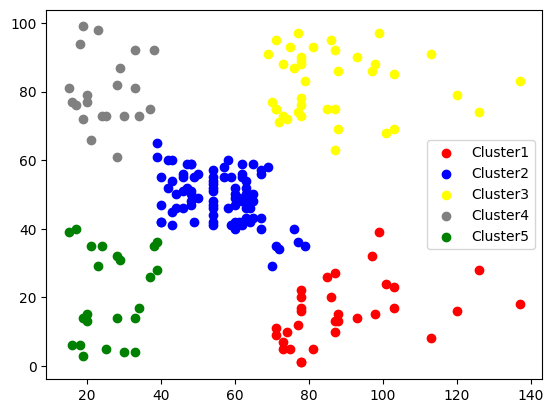

In [8]:
#Plot the clusters
plt.scatter(x[yhc==0,0],x[yhc==0,1],c='red',label='Cluster1')
plt.scatter(x[yhc==1,0],x[yhc==1,1],c='blue',label='Cluster2')
plt.scatter(x[yhc==2,0],x[yhc==2,1],c='yellow',label='Cluster3')
plt.scatter(x[yhc==3,0],x[yhc==3,1],c='gray',label='Cluster4')
plt.scatter(x[yhc==4,0],x[yhc==4,1],c='green',label='Cluster5')
plt.legend()

In [9]:
#DBSCAN

In [10]:
#Density - how many numbers of clusrter are together
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
x = StandardScaler().fit_transform(x)

In [29]:
db = DBSCAN(eps=0.3,min_samples=6).fit(x)

In [30]:
db.labels_

array([ 1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  5,  3,  5,  3,  5, -1,
        5,  3,  5,  3,  5, -1,  5,  3,  5, -1, -1, -1,  5, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [31]:
#-1 indicates the noisy points
#if we use 1, the cluster will point itself
#How to get the core samples:
db.core_sample_indices_

array([  3,   5,   9,  13,  15,  16,  21,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 125, 126, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 147, 149,
       151, 153, 154, 155, 157, 159, 161, 163, 165, 166, 170, 174, 176,
       178])

In [34]:
#Identify the boundary samples points
#Visualize the points in following categories:
#Noise pointes - black
#all the cluster points as different colors
#if the core seize is rhera, core point size > boundary point size
len(set(db.labels_))

7